#IPL Data Analysis Hackethon

Here we got two datasets where having matches info and by ball player info from this we can analyse the IPL data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
delv_df =pd.read_csv(r"/content/drive/MyDrive/csv_files/deliveries.csv")
delv_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [9]:
delv_df.shape

(179078, 21)

In [5]:
matc_df = pd.read_csv(r"/content/drive/MyDrive/csv_files/matches.csv")
matc_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [11]:
matc_df.shape

(756, 18)

In [6]:
delv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
matc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

from this we can find that umpire3 having lots of missing values

At first we need to merge the two datasets

In [12]:
df=pd.merge(delv_df, matc_df, left_on='match_id', right_on='id')

In [13]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [14]:
df.shape

(179078, 39)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

#Exploretory data Analysis

##1. In which city that hosted the highest number of seasons

In [17]:
city_season_counts =df.groupby('city')['season'].nunique()

# Find the city with the highest number of seasons hosted
max_seasons_city = city_season_counts.idxmax()

# Display the result
print(f"The city that hosted the highest number of seasons is: {max_seasons_city}")

The city that hosted the highest number of seasons is: Delhi


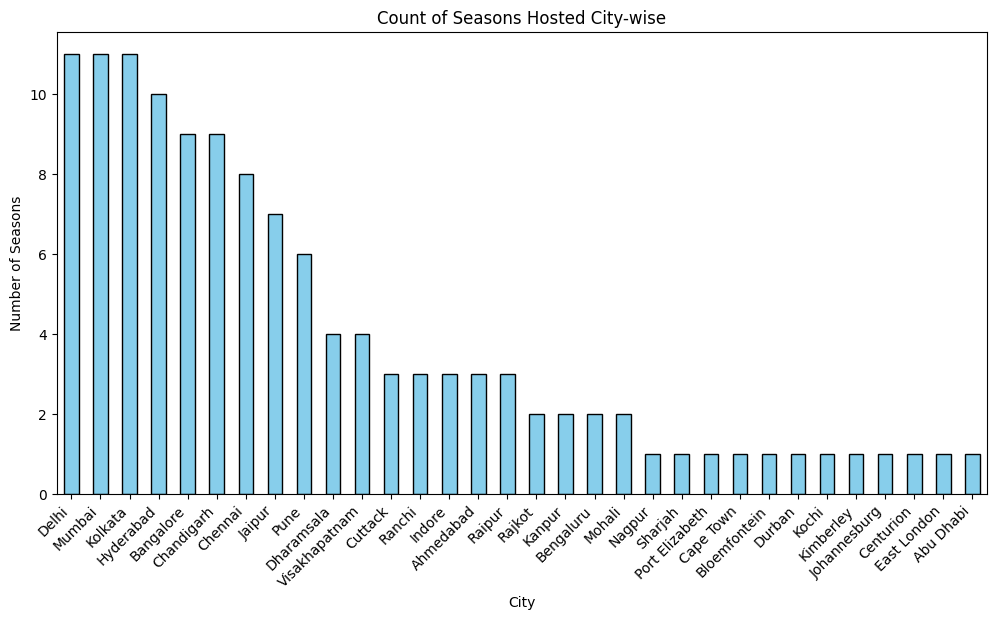

In [18]:
plt.figure(figsize=(12, 6))
city_season_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Seasons Hosted City-wise')
plt.xlabel('City')
plt.ylabel('Number of Seasons')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## 2. In which yer the highest Number of matches played?

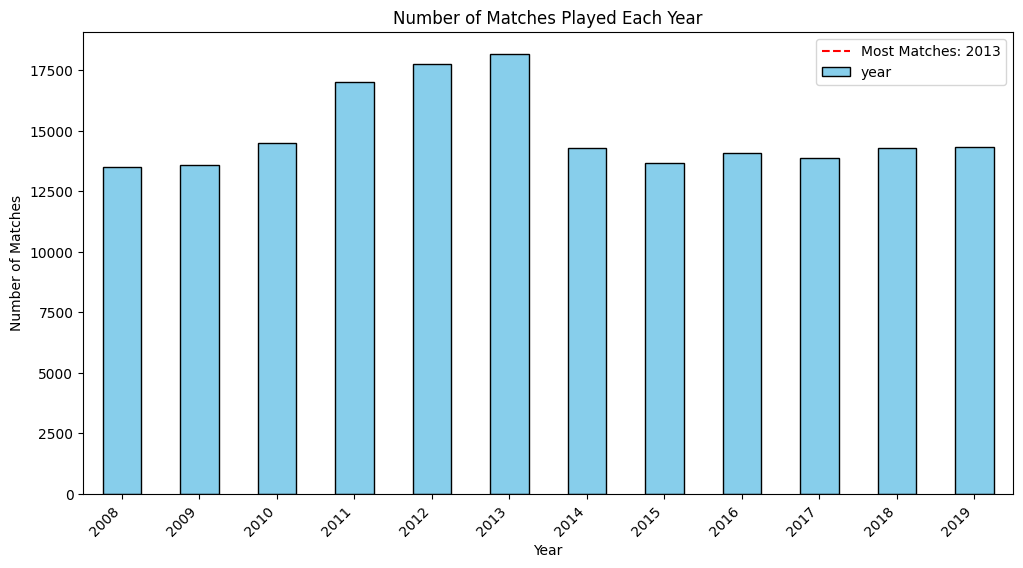

In [20]:
df['year'] = pd.to_datetime(df['date']).dt.year

# Group by 'year' and count the number of matches
matches_per_year = df['year'].value_counts()

most_matches_year = matches_per_year.idxmax()

# Create a bar graph
plt.figure(figsize=(12, 6))
matches_per_year.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Matches Played Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')

# Highlight the year with the most matches
plt.axvline(x=most_matches_year, color='red', linestyle='--', label=f'Most Matches: {most_matches_year}')
plt.legend()

plt.show()

In the year 2013 has the highest number of matches played

##3. In the year 2011 No of wins by Mumbai Indians

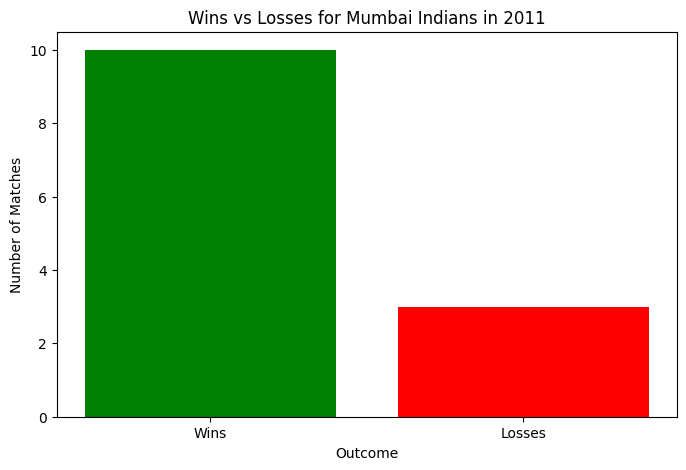

total Number of wins by MI in year 2011: 10


In [86]:
df['year'] = pd.to_datetime(df['date']).dt.year

# Filter data for the year 2011
matches_2011 = df[df['year'] == 2011]

# Filter data for matches where Mumbai Indians won
mi_wins_2011 = matches_2011[matches_2011['winner'] == 'Mumbai Indians']

# Find the maximum number of wins by Mumbai Indians in 2011
max_wins_mi_2011 = mi_wins_2011['match_id'].nunique()

# Find the number of matches lost by Mumbai Indians in 2011
matches_lost_2011 = matches_2011[matches_2011['team1'].isin(['Mumbai Indians', 'Mumbai Indians']) & (matches_2011['winner'] != 'Mumbai Indians')]
num_lost_2011 = matches_lost_2011['match_id'].nunique()

# Plot wins versus losses
plt.figure(figsize=(8, 5))
plt.bar(['Wins', 'Losses'], [max_wins_mi_2011, num_lost_2011], color=['green', 'red'])
plt.title('Wins vs Losses for Mumbai Indians in 2011')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
plt.show()
print("total Number of wins by MI in year 2011:",max_wins_mi_2011)

##4. Finding the percentage of toss Decision

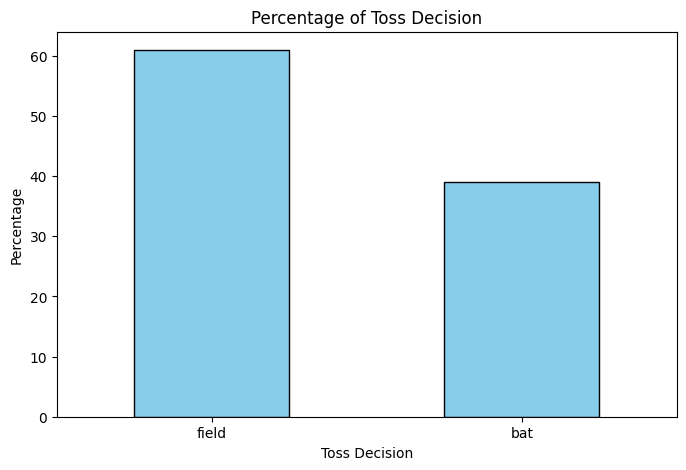

Percentage of getting 'bat' and 'field' in toss decision:
field    60.9913
bat      39.0087
Name: toss_decision, dtype: float64


In [29]:
toss_decision_percentage = df['toss_decision'].value_counts(normalize=True) * 100

# Plot the percentages
plt.figure(figsize=(8, 5))
toss_decision_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

# Display the percentages
print("Percentage of getting 'bat' and 'field' in toss decision:")
print(toss_decision_percentage)

## 5.what is the winning comparision Regarding the toss decision

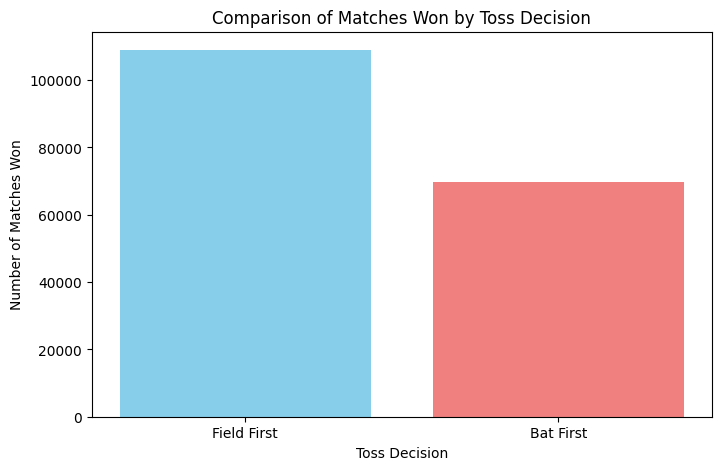

In [32]:
field_wins = df[df['toss_decision'] == 'field']['winner'].count()

# Count the number of matches won by teams choosing to bat first
bat_wins = df[df['toss_decision'] == 'bat']['winner'].count()

plt.figure(figsize=(8, 5))
plt.bar(['Field First', 'Bat First'], [field_wins, bat_wins], color=['skyblue', 'lightcoral'])
plt.title('Comparison of Matches Won by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches Won')
plt.show()

Field First having the high casualituy of winning in toss decission

##6.By taking batting in second innings highest matches won in year

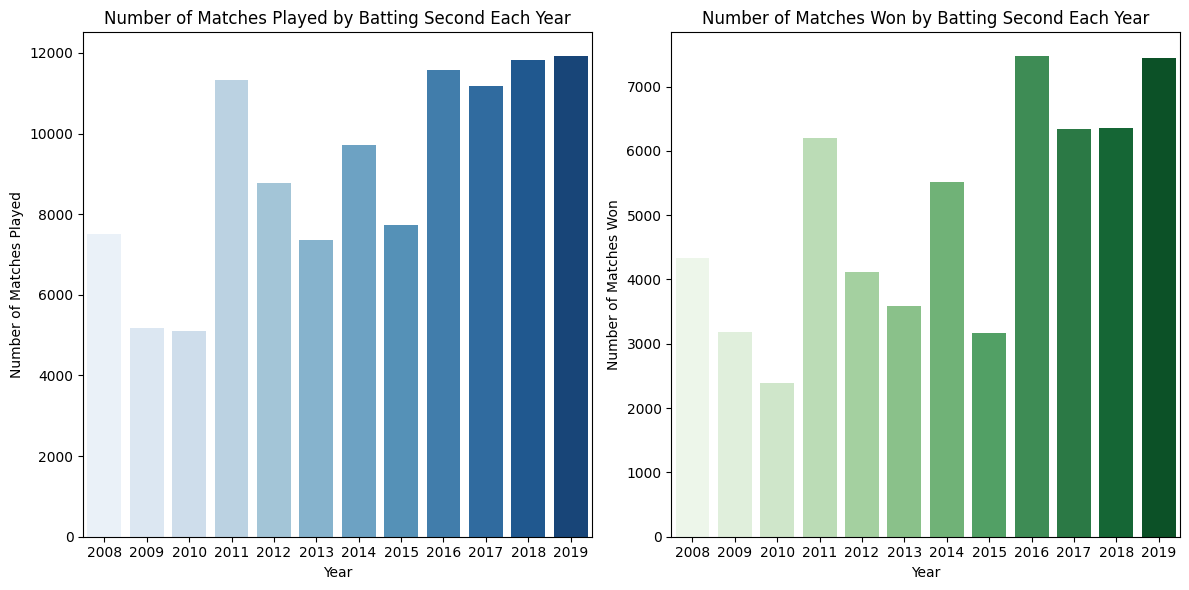

In [82]:
matches_played_by_year = df[df['toss_decision'] == 'field'].groupby('season')['match_id'].count()
batting_second_wins_by_year = df[(df['toss_decision'] == 'field') & (df['winner'] == df['team2'])].groupby('season')['match_id'].count()

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot matches played
plt.subplot(1, 2, 1)
sns.barplot(x=matches_played_by_year.index, y=matches_played_by_year.values, palette='Blues')
plt.title('Number of Matches Played by Batting Second Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches Played')

# Plot matches won
plt.subplot(1, 2, 2)
sns.barplot(x=batting_second_wins_by_year.index, y=batting_second_wins_by_year.values, palette='Greens')
plt.title('Number of Matches Won by Batting Second Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches Won')

plt.tight_layout()
plt.show()

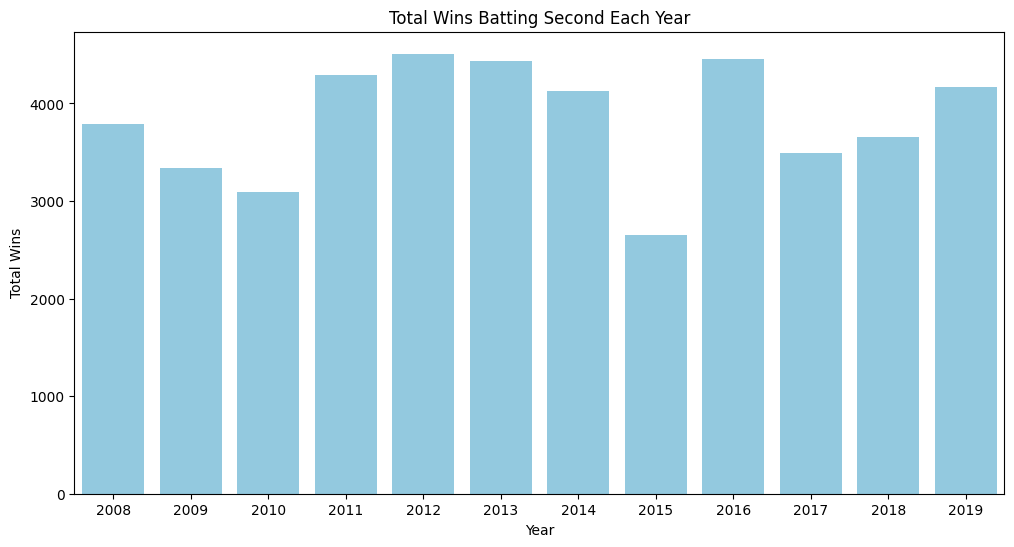

In [94]:
batting_second_df = df[df['inning'] == 2]

# Group by year and count the total number of wins
total_wins_by_year = batting_second_df[batting_second_df['winner'] == batting_second_df['batting_team']].groupby('season')['match_id'].count().reset_index(name='total_wins')

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot total wins
sns.barplot(x='season', y='total_wins', data=total_wins_by_year, color='skyblue')
plt.title('Total Wins Batting Second Each Year')
plt.xlabel('Year')
plt.ylabel('Total Wins')

plt.show()

## 7: top 10 batsmen having high run getters

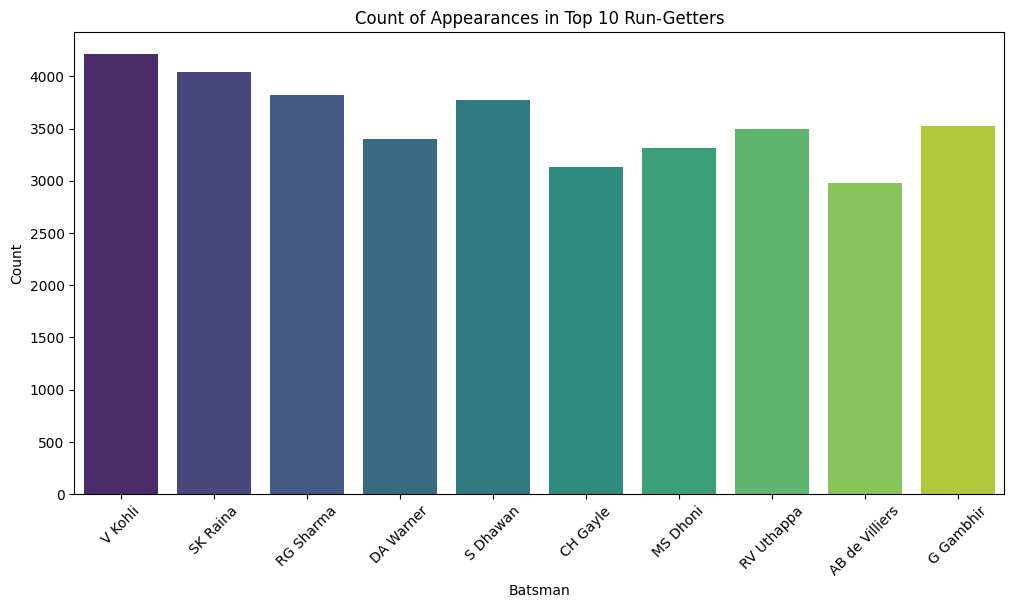

In [44]:
top_10_batsmen =df.groupby('batsman')['batsman_runs'].sum().nlargest(10).index

# Filter the DataFrame for the top 10 batsmen
top_10_batsmen_df = df[df['batsman'].isin(top_10_batsmen)]



plt.figure(figsize=(12, 6))
sns.countplot(x='batsman', data=top_10_df, order=top_10_batsmen, palette='viridis')
plt.title('Count of Appearances in Top 10 Run-Getters')
plt.xlabel('Batsman')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

V Kohli has the highest in number

##8: Which batsman scores highest no of runs by hiting 6's  and 4's

In [95]:
df_2019 = df[df['year'] == 2019]

# Group by batsman and sum the runs scored from 4's and 6's
batsman_runs_4_6 = df_2019.groupby('batsman')['batsman_runs'].apply(lambda x: (x == 4).sum() + 2 * (x == 6).sum())

# Find the batsman with the highest runs from 4's and 6's
top_batsman_4_6 = batsman_runs_4_6.idxmax()
runs_by_4_6 = batsman_runs_4_6.max()

print(f"In 2019, {top_batsman_4_6} scored the highest number of runs by hitting 4's and 6's: {runs_by_4_6} runs.")

In 2019, AD Russell scored the highest number of runs by hitting 4's and 6's: 135 runs.


## 9: which bowler has the most no of wickets ?

In [46]:
bowler_wickets = df[df['dismissal_kind'].notnull()].groupby('bowler')['dismissal_kind'].count()

# Find the bowler with the most number of wickets
top_bowler = bowler_wickets.idxmax()
total_wickets = bowler_wickets.max()

print(f"The bowler with the most number of wickets is {top_bowler} with {total_wickets} wickets.")

The bowler with the most number of wickets is SL Malinga with 188 wickets.


##10: what is the V kohli's strike rate in the year 2016?

In [58]:
df['year'] = pd.to_datetime(df['date']).dt.year

# Filter data for Virat Kohli in 2016
kohli_2016 = df[(df['batsman'] == 'V Kohli') & (df['year'] == 2016)]

# Calculate total runs scored by Kohli in 2016
total_runs = kohli_2016['batsman_runs'].sum()

# Calculate total balls faced by Kohli in 2016
total_balls_faced = kohli_2016['ball'].sum()

# Calculate strike rate
strike_rate = (total_runs / total_balls_faced) * 100

print(f"Virat Kohli's strike rate in 2016 was {strike_rate:.2f}")

Virat Kohli's strike rate in 2016 was 43.34


## 11: which bowler has maximum no of extras?


In [60]:
extras_by_bowler = df.groupby('bowler')['extra_runs'].sum()

# Find the bowler(s) with the maximum number of extras
max_extras_bowlers = extras_by_bowler[extras_by_bowler == extras_by_bowler.max()]

print("Bowler(s) with the maximum number of extras:")
print(max_extras_bowlers)

Bowler(s) with the maximum number of extras:
bowler
SL Malinga    293
Name: extra_runs, dtype: int64


##12: At what venue that most of the IPL matches Hosted?

In [62]:
# Count the number of matches hosted by each venue
venue_match_counts = df['venue'].value_counts()

# Find the venue(s) with the maximum number of matches hosted
max_matches_venue = venue_match_counts.idxmax()

print(f"The venue that has hosted the most number of IPL matches is: {max_matches_venue}")

The venue that has hosted the most number of IPL matches is: Eden Gardens


##13. In the match between Sunrisers Hyderabad and Royal Challengers Bangalore in 2017 who was the player of the match?

In [63]:
match_data = df[(df['team1'] == 'Sunrisers Hyderabad') | (df['team2'] == 'Sunrisers Hyderabad')]
match_data = match_data[(match_data['team1'] == 'Royal Challengers Bangalore') | (match_data['team2'] == 'Royal Challengers Bangalore')]
match_data = match_data[match_data['season'] == 2017]

# Get the Player of the Match for that specific match
player_of_match = match_data['player_of_match'].values[0]

print(f" Sunrisers Hyderabad VS Royal Challengers Bangalore 2K17, the Player of the Match was: {player_of_match}")

In the match between Sunrisers Hyderabad and Royal Challengers Bangalore in 2017, the Player of the Match was: Yuvraj Singh


##14: Top five batsmen with the most number of run-outs

In [96]:
run_outs_data = df[df['dismissal_kind'] == 'run out']

# Group by batsman and count the number of run-outs
run_outs_by_batsman = run_outs_data.groupby('batsman')['dismissal_kind'].count()

# Get the top three batsmen with the most run-outs
top_five_batsmen_run_outs = run_outs_by_batsman.nlargest(5)

print("Top five batsmen with the most number of run-outs:")
print(top_five_batsmen_run_outs)

Top five batsmen with the most number of run-outs:
batsman
MS Dhoni      21
RG Sharma     17
KD Karthik    16
G Gambhir     15
V Kohli       15
Name: dismissal_kind, dtype: int64


##15:What are the total runs scored by V Kohli against JJ Bumrah

In [68]:
kohli_vs_bumrah_data = df[(df['batsman'] == 'V Kohli') & (df['bowler'] == 'JJ Bumrah')]

# Sum the total runs scored by V Kohli
total_runs_by_kohli_vs_bumrah = kohli_vs_bumrah_data['total_runs'].sum()

print(f"Total runs scored by V Kohli against JJ Bumrah: {total_runs_by_kohli_vs_bumrah}")

Total runs scored by V Kohli against JJ Bumrah: 114


#16:The player with the maximum number of caught and bowled dismissals

In [69]:
caught_and_bowled_data = df[df['dismissal_kind'] == 'caught and bowled']

# Group by batsman and count the number of caught and bowled dismissals
caught_and_bowled_counts = caught_and_bowled_data['batsman'].value_counts()

# Get the player with the maximum number of caught and bowled dismissals
max_caught_and_bowled_player = caught_and_bowled_counts.idxmax()
max_caught_and_bowled_count = caught_and_bowled_counts.max()

print(f"The player with the maximum number of caught and bowled dismissals is {max_caught_and_bowled_player} with {max_caught_and_bowled_count} dismissals.")

The player with the maximum number of caught and bowled dismissals is SK Raina with 7 dismissals.


##17:Hard-hitting ability (fours and sixes per ball) for the top 5 batsmen:


In [79]:
fours_and_sixes_data = df[df['total_runs'].isin([4, 6])]

# Group by batsman and calculate the count of fours and sixes for each ball
batsman_fours_sixes_count = fours_and_sixes_data.groupby(['batsman', 'match_id', 'inning', 'over', 'ball'])['total_runs'].value_counts().unstack(fill_value=0)

# Sum the counts for each batsman to get the total count of fours and sixes
batsman_total_fours_sixes_count = batsman_fours_sixes_count.groupby('batsman').sum()

# Calculate the total count of fours and sixes for each batsman
batsman_total_fours_sixes_count['Total Fours'] = batsman_total_fours_sixes_count[4]
batsman_total_fours_sixes_count['Total Sixes'] = batsman_total_fours_sixes_count[6]
batsman_total_fours_sixes_count = batsman_total_fours_sixes_count[['Total Fours', 'Total Sixes']]

# Sort by the total count of fours and sixes in descending order
top_batsmen = batsman_total_fours_sixes_count.sum(axis=1).sort_values(ascending=False).head(5)

# Filter the top 5 batsmen from the merged dataset
top_batsmen_data = df[df['batsman'].isin(top_batsmen.index)]

# Group by batsman and calculate the count of balls faced
balls_faced_count = top_batsmen_data.groupby('batsman')['ball'].count()

# Calculate the hard-hitting ability (fours and sixes per ball) for each batsman
hard_hitting_ability = top_batsmen.divide(balls_faced_count)

print("Hard-hitting ability (fours and sixes per ball) for the top 5 batsmen:")
print(hard_hitting_ability)

Hard-hitting ability (fours and sixes per ball) for the top 5 batsmen:
batsman
CH Gayle     0.225168
DA Warner    0.188640
S Dhawan     0.165254
SK Raina     0.169634
V Kohli      0.160532
dtype: float64
